In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Random Stochastic Bandit

In [60]:
def stochastic_bandit_random(arms,T_max,sigma):
    K = len(arms) #nombre de bras
    est = [0]*K #estimation en activant chaque bras une fois
    for i in range(K):
        est[i] = np.random.normal(arms[i],sigma)
    N = [1]*K #Nombre d'activation de chaque bras
    R = [0] #Regret
    best = np.max(arms) #Meilleur bras (valeur)
    for t in range(T_max):
        
        pull_i = np.random.randint(K) #Choix d'un bras aléatoirement
        
        reward = np.random.normal(arms[pull_i],sigma) #Recuperation de la récompense
        est[pull_i] = (est[pull_i]*N[pull_i] + reward)/(N[pull_i]+1) #Mise a jour de l'estimation
        N[pull_i] += 1 #Mise à jour du nombre d'activation
        R.append(R[-1]+(best-arms[pull_i])) #Mise à jour du regret
    return R,(np.argmax(arms) == np.argmax(est))


Is the answer correct ?  True
Regret final : 20097


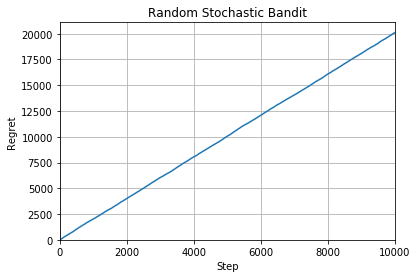

In [61]:
arms  = [1,2,3,4,5]
T_max = 10000
sigma = 1

R_random,success = stochastic_bandit_random(arms,T_max,sigma)
print("Is the answer correct ? ",success)
print("Regret final :",R_random[-1])
plt.plot(R_random)
plt.xlim(0,T_max)
plt.xlabel("Step")
plt.ylabel("Regret")
plt.title("Random Stochastic Bandit")
plt.ylim(0)
plt.grid()
plt.show()
        

On peut utiliser l'inégalité d'Hoeffding pour avoir des bornes sur le regret

$ \mathbb P (|\frac{1}{T_{max}}R(T_{max}) -  \frac{1}{n_{arms}} \sum_{i = 1}^{n_{arms}} (\mu^* - \mu_i)| > \epsilon) \le 2exp(-2T_{max}\epsilon^2) $

Ici $\frac{1}{n_{arms}} \sum_{i = 1}^{n_{arms}} (\mu^* - \mu_i) = \frac{1}{5}(0+1+2+3+4) = 2$ 

On a $\mathbb E[R(T_{max})] = O(T_{max})$



In [62]:
mean_regret = R_random[-1]/T_max
epsilon = np.abs(2-mean_regret)
print(2*np.exp(-2*T_max*epsilon**2))

0.3046313812284789


## $\epsilon$-greedy Stochastic Bandit

In [63]:

def stochastic_bandit_greedy(arms,T_max,sigma, alpha,root=False):
    K = len(arms) #nombre de bras
    est = [0]*K #estimation en activant chaque bras une fois
    for i in range(K):
        est[i] = np.random.normal(arms[i],sigma)
    N = [1]*K #Nombre d'activation de chaque bras
    R = [0] #Regret
    best = np.max(arms) #Meilleur bras (valeur)
    for t in range(T_max):
        
        greed_factor = np.random.rand() #nombre aléatoire
        
        if root: #Choix du epsilon
            epsilon = alpha/np.sqrt(t+1)
        else:
            epsilon = alpha/(t+1)
            
        if greed_factor < epsilon:
            pull_i = np.random.randint(K)
        else:
            pull_i = np.argmax(est)
            
        reward = np.random.normal(arms[pull_i],sigma) #Recuperation de la récompense
        est[pull_i] = (est[pull_i]*N[pull_i] + reward)/(N[pull_i]+1) #Mise a jour de l'estimation
        N[pull_i] += 1 #Mise à jour du nombre d'activation
        R.append(R[-1]+(best-arms[pull_i])) #Mise à jour du regret
    return R,(np.argmax(arms)==np.argmax(est))

On prends $\alpha = \sqrt{2\log(T_{max})}$

Is the answer correct ?  True
Regret final : 1.9327017536002842


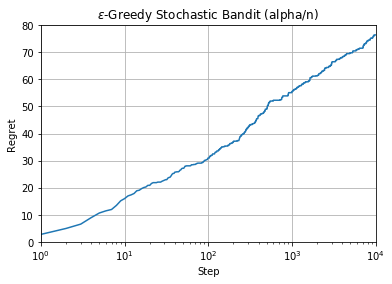

In [64]:
arms  = [1,2,3,4,5]
T_max = 10000
sigma = 1
alpha = np.sqrt(2*np.log(T_max))
R_eps1 = [0]*T_max
for _ in range(10):
    R_r,success = stochastic_bandit_greedy(arms,T_max,sigma,alpha)
    for i in range(T_max):
        R_eps1[i] += R_r[i]
for i in range(T_max):
        R_eps1[i] /= 10
        
        
print("Is the answer correct ? ",success)
print("Regret final :",R_eps1[-1]/(alpha*np.log(T_max)))
plt.plot(R_eps1)
plt.xlim(1,T_max)
plt.xscale("log")
plt.xlabel("Step")
plt.ylabel("Regret")
plt.title(r"$\epsilon$-Greedy Stochastic Bandit (alpha/n)")
plt.ylim(0)
plt.grid()
plt.show()
        

On utilise l'inéquation d'Hoeffding :

$ \mathbb P (  \frac{1}{T_{max}}\mathbb E[R(T_{max})] - \frac{1}{T_{max}}R(T_{max})  > \epsilon) \le 2exp(-2T_{max}\epsilon^2) $

$ \mathbb P (  (\frac{1}{T_{max}}\sum_{t=1}^{T_{max}} \frac{\alpha}{t})(\frac{1}{n_{arms}} \sum_{i = 1}^{n_{arms}} (\mu^* - \mu_i)) - \frac{1}{T_{max}}R(T_{max})  > \epsilon) \le 2exp(-2T_{max}\epsilon^2) $

Or $\sum_{t=1}^{T_{max}}\frac{\alpha}{t} = \alpha(log(T_{max}) + \gamma + o(1)) \sim \alpha log(T_{max})$ and $(\frac{1}{n_{arms}} \sum_{i = 1}^{n_{arms}} (\mu^* - \mu_i)) =2$

Finalement $\mathbb E[R(T_{max})] = O(\alpha log(T_{max})) = O(log(T_{max})^{\frac{3}{2}})$ avec la valeur de $\alpha = \sqrt{2log(T_{max})}$


Is the answer correct ?  True
Regret final : 4.107583291912654


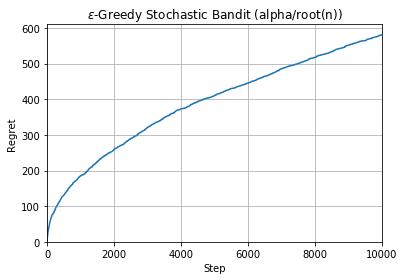

In [69]:
arms  = [1,2,3,4,5]
T_max = 10000
sigma = 1
alpha = np.sqrt(2)

R_eps2 = [0]*T_max
for _ in range(10):
    R_r,success = stochastic_bandit_greedy(arms,T_max,sigma,alpha,True)
    for i in range(T_max):
        R_eps2[i] += R_r[i]
        
for i in range(T_max):
    R_eps2[i] /= 10

print("Is the answer correct ? ",success)
print("Regret final :",R_eps2[-1]/(alpha*np.sqrt(T_max)))
plt.plot(R_eps2)
plt.xlim(0,T_max)
plt.xlabel("Step")
plt.ylabel("Regret")
plt.title(r"$\epsilon$-Greedy Stochastic Bandit (alpha/root(n))")
plt.ylim(0)
plt.grid()
plt.show()

On utilise l'inéquation d'Hoeffding :

$ \mathbb P (  \frac{1}{T_{max}}\mathbb E[R(T_{max})] - \frac{1}{T_{max}}R(T_{max})  > \epsilon) \le 2exp(-2T_{max}\epsilon^2) $

$ \mathbb P (  (\frac{1}{T_{max}}\sum_{t=1}^{\sqrt{T_{max}}} \frac{\alpha}{t})(\frac{1}{n_{arms}} \sum_{i = 1}^{n_{arms}} (\mu^* - \mu_i)) - \frac{1}{T_{max}}R(T_{max})  > \epsilon) \le 2exp(-2T_{max}\epsilon^2) $

Or $\sum_{t=1}^{T_{max}}\frac{\alpha}{\sqrt{T_{max}}} \sim \alpha(2\sqrt{T_{max}})$.

Finalement $\mathbb E[R(T_{max})] = O(\alpha \sqrt{T_{max}}) = O(log(T_{max})\times \sqrt{T_{max}})$ avec la valeur de $\alpha = \sqrt{2log(T_{max})}$


## Upper Confidence Bound Stochastic Bandit

In [66]:
def stochastic_bandit_UCB(arms,T_max,sigma, alpha):
    K = len(arms) #nombre de bras
    est = [0]*K #estimation en activant chaque bras une fois
    for i in range(K):
        est[i] = np.random.normal(arms[i],sigma)
    N = [1]*K #Nombre d'activation de chaque bras
    R = [0] #Regret
    best = np.max(arms) #Meilleur bras (valeur)
    for t in range(T_max):
        
        pull_i = np.argmax([est[i]+alpha/np.sqrt(N[i]) for i in range(K)])
        
        reward = np.random.normal(arms[pull_i],sigma) #Recuperation de la récompense
        est[pull_i] = (est[pull_i]*N[pull_i] + reward)/(N[pull_i]+1) #Mise a jour de l'estimation
        N[pull_i] += 1 #Mise à jour du nombre d'activation
        R.append(R[-1]+(best-arms[pull_i])) #Mise à jour du regret
    return R,(np.argmax(arms) == np.argmax(est))

Is the answer correct ?  True


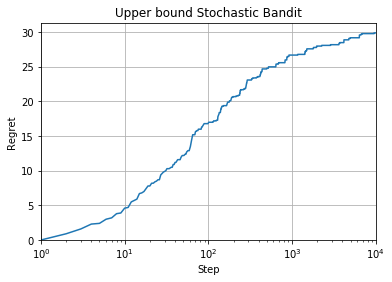

In [67]:
arms  = [1,2,3,4,5]
T_max = 10000
sigma = 1
alpha = np.sqrt(2*np.log(T_max))

R_UCB1 = [0]*T_max
for _ in range(10):
    R_r,success = stochastic_bandit_UCB(arms,T_max,sigma,alpha)
    for i in range(T_max):
        R_UCB1[i] += R_r[i]

for i in range(T_max):
    R_UCB1[i] /= 10
print("Is the answer correct ? ",success)
plt.plot(R_UCB1)
plt.xlim(1,T_max)
plt.xscale('log')
plt.xlabel("Step")
plt.ylabel("Regret")
plt.title(r"Upper bound Stochastic Bandit")
plt.ylim(0)
plt.grid()
plt.show()

## Comparaison

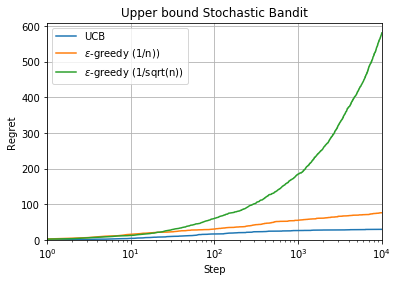

In [71]:

#plt.plot(R_random,label="random")
plt.plot(R_UCB1,label="UCB")
plt.plot(R_eps1,label=r"$\epsilon$-greedy (1/n))")
plt.plot(R_eps2,label=r"$\epsilon$-greedy (1/sqrt(n))")
plt.plot()
plt.xlim(1,T_max)
plt.xscale('log')
plt.xlabel("Step")
plt.ylabel("Regret")
plt.title(r"Upper bound Stochastic Bandit")
plt.ylim(0)
plt.legend()
plt.grid()
plt.show()

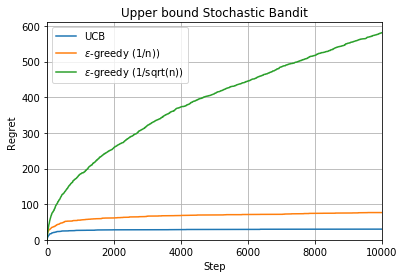

In [75]:

#plt.plot(R_random,label="random")
plt.plot(R_UCB1,label="UCB")
plt.plot(R_eps1,label=r"$\epsilon$-greedy (1/n))")
plt.plot(R_eps2,label=r"$\epsilon$-greedy (1/sqrt(n))")
plt.plot()
plt.xlim(1,T_max)
plt.xlabel("Step")
plt.ylabel("Regret")
plt.title(r"Upper bound Stochastic Bandit")
plt.ylim(0)
plt.legend()
plt.grid()
plt.show()

# LinUCB

In [ ]:
def stochastic_bandit_UCB(arms,T_max,sigma, alpha):
    K = len(arms) #nombre de bras
    est = [0]*K #estimation en activant chaque bras une fois
    for i in range(K):
        est[i] = np.random.normal(arms[i],sigma)
    N = [1]*K #Nombre d'activation de chaque bras
    R = [0] #Regret
    best = np.max(arms) #Meilleur bras (valeur)
    for t in range(T_max):
        
        pull_i = np.argmax([est[i]+alpha/np.sqrt(N[i]) for i in range(K)])
        
        reward = np.random.normal(arms[pull_i],sigma) #Recuperation de la récompense
        est[pull_i] = (est[pull_i]*N[pull_i] + reward)/(N[pull_i]+1) #Mise a jour de l'estimation
        N[pull_i] += 1 #Mise à jour du nombre d'activation
        R.append(R[-1]+(best-arms[pull_i])) #Mise à jour du regret
    return R,(np.argmax(arms) == np.argmax(est))